# Домашнее задание №2

### Задча №1
Ваша главная задача - обучить один нейрон с сигмоидальной функцией активации (по сути логистическую регрессию) отличать рукописные шестерки и пятерки. В качестве датасета используется 10000 фотографий пятерок и шестерок из набора [MNIST](http://yann.lecun.com/exdb/mnist/). Вам будет необходимо реализовать две одинаковые нейронные сети: одну на Keras, другую - на PyTorch. 

Но сначала вам необходимо подготовить данные.

In [1]:
# Импортируем все нужные бибилиотеки

import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
%matplotlib inline

np.random.seed(42)

In [2]:
# Загружаем данные (для этого необходимо поместить файл Data.pickle в ту же деректорию, где лежит этот ноутбук)

with open('./Data.pickle', 'rb') as f:
    train = pickle.load(f)

In [3]:
# обратите внимание, что train - словарь с данными и ответами

train

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'labels': array([5., 5., 6., ..., 6., 5., 6.])}

In [4]:
# Вот так выглядит пятерка в массиве

train["data"][0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  45, 102, 150, 255, 198,  24,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

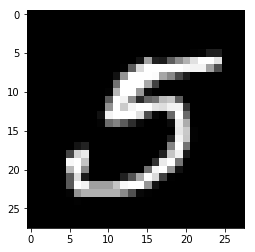

In [5]:
# Пример, как можно визуализировать данные

plt.imshow(train['data'][1].reshape(28,28), cmap = "gray")

In [6]:
# Выделите в переменную X данные, а в переменную y метки классов

X = train['data']
y = train['labels']

In [7]:
# Переобозначте метки классов: там, где сейчас метка 5, присвойте метку 0, а на место 6 поставте 1

y[y==5] = 0
y[y==6] = 1

In [8]:
# С помощью метода train_test_split отделите треть данных для контроля за переобучением

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [9]:
# Так как значения яркости пискилей лежат в диопазоне 0-255, то мы можем отнормировать на это значение входные данные,
# так нейросети будет проще обучаться

x_train = x_train/255
x_test = x_test/255

### Задача №2
Реализуйте две одинаковых нейронных сети с одним нейроном, который будет принимать на вход 784 размерный вектор (вытянутую в вектор картику размера 28x28) и возвращать вероятность того, что на этой фотографии изображена 5. Одну сеть реализуйте на Keras, другую - на Pytorch.

### Keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers

Using TensorFlow backend.


In [11]:
# Создайте последовательную модель (см. Sequential) и добавьте к ней один нейрон с сигмоидальной функцией активации, 
# который принимает на вход вектор размерности 784

Keras_model = Sequential()
Keras_model.add(Dense(1, activation = "sigmoid", input_shape = [784]))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Скомпилируйте построенную модель. В качестве оптимизатора используйте SGD, RMSprop и Adam (необходимо обучить сеть три раза 
# с разными оптимизаторами, сравнить результаты и сделать выводы). Функция потерь - бинарная кросс-энтропия, а метрика качества - 
# точность

Keras_model.compile(optimizer = "sgd", loss = "binary_crossentropy", metrics = ["accuracy"])

In [13]:
# Самостоятельно выберете размер батча при обучении и количество эпох обучения

batch_size = 128 
epochs = 50

In [14]:
%%time

# Обучите нейронныую сеть, используя метод fit, замерьте время обучения.

history = Keras_model.fit(x_train, y_train, batch_size = batch_size, nb_epoch = epochs, verbose = 1, validation_data = (x_test, y_test)) 
score = Keras_model.evaluate(x_test, y_test, verbose = 0)

c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.cast instead.
Train on 6700 samples, validate on 3300 samples
Epoch 1/50
6700/6700 [==============================] - ETA: 18s - loss: 0.7022 - acc: 0.54 - ETA: 0s - loss: 0.6283 - acc: 0.6664 - ETA: 0s - loss: 0.5837 - acc: 0.737 - ETA: 0s - loss: 0.5395 - acc: 0.789 - 1s 98us/step - loss: 0.5174 - acc: 0.8076 - val_loss: 0.3839 - val_acc: 0.9182
Epoch 2/50
6700/6700 [==============================] - ETA: 0s - loss: 0.3689 - acc: 0.960 - ETA: 0s - loss: 0.3706 - acc: 0.921 - ETA: 0s - loss: 0.3588 - acc: 0.921 - ETA: 0s - loss: 0.3469 - acc: 0.924 - ETA: 0s - loss: 0.3352 - acc: 0.928 - 0s 40us/step - loss: 0.3341 - acc: 0.9276 - val_loss: 0.2814 - val_acc: 0.9467
Epoch 3/50
6700/6700 [==============================] - ETA: 0s - loss: 0.2819 - acc: 0.937 - ETA: 0s - loss: 0.2879 - acc: 0.933 - ETA: 0s - loss: 0.2747 - acc: 0.939 - ETA: 0s - loss: 0.2676 - acc: 0.941 - 0s 37us/step - loss: 0.2649 - acc: 0.9421 - val_loss: 0.2319 - val_acc: 0.9539
Epoc

6700/6700 [==============================] - ETA: 0s - loss: 0.0775 - acc: 0.984 - ETA: 0s - loss: 0.1019 - acc: 0.967 - ETA: 0s - loss: 0.1087 - acc: 0.965 - 0s 27us/step - loss: 0.1055 - acc: 0.9681 - val_loss: 0.0910 - val_acc: 0.9776
Epoch 31/50
6700/6700 [==============================] - ETA: 0s - loss: 0.0742 - acc: 0.984 - ETA: 0s - loss: 0.1068 - acc: 0.969 - ETA: 0s - loss: 0.1050 - acc: 0.968 - 0s 26us/step - loss: 0.1046 - acc: 0.9685 - val_loss: 0.0901 - val_acc: 0.9776
Epoch 32/50
6700/6700 [==============================] - ETA: 0s - loss: 0.1100 - acc: 0.953 - ETA: 0s - loss: 0.1004 - acc: 0.971 - ETA: 0s - loss: 0.1034 - acc: 0.969 - ETA: 0s - loss: 0.1036 - acc: 0.968 - 0s 35us/step - loss: 0.1037 - acc: 0.9685 - val_loss: 0.0892 - val_acc: 0.9776
Epoch 33/50
6700/6700 [==============================] - ETA: 0s - loss: 0.0947 - acc: 0.968 - ETA: 0s - loss: 0.1042 - acc: 0.966 - ETA: 0s - loss: 0.1067 - acc: 0.967 - ETA: 0s - loss: 0.1049 - acc: 0.968 - ETA: 0s - loss:

In [15]:
# Исользуя score, распечатайте итоговые значения функции потерь и точности 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.07901459779703256
Test accuracy: 0.9784848484848485


In [16]:
H = history
N = np.arange(0, epochs)

В переменных H.history["loss"] и H.history["val_loss"] хранятся значения функции потерь на всех эпохах на тренировочном и теством наборах данных соответственно. Аналогичные значения, но для точности хранятся в H.history["acc"] и H.history["val_acc"].

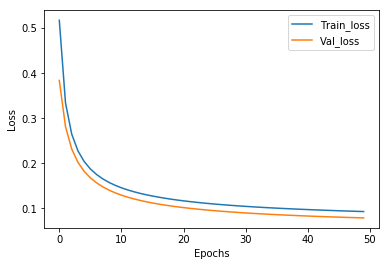

In [17]:
# Отрисуйте графики функиции потерь на тестовом наборе и на тренировочном

plt.plot(N, H.history["loss"], label = "Train_loss")
plt.plot(N, H.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

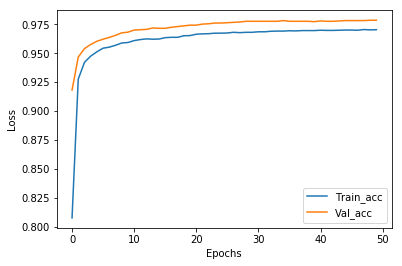

In [18]:
# Отрисуйте графики точности на тестовом наборе и на тренировочном

plt.plot(N, H.history["acc"], label = "Train_acc")
plt.plot(N, H.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Выводы по результатам работы разных оптимизаторов:


### Pytorch

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
%matplotlib inline

In [20]:
# Создайте класс вашей сети (не забудьтье относледовать его от класса torch.nn.Module!)

class My_Net(torch.nn.Module):
    def __init__(self):
        super(My_Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 1)
        self.act1 = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        return x

In [21]:
# Создайте экземпляр вашего класса и задайте функцию потерь и оптимищатор, который показал себя лучше всего на Keras. 
# Выберете количество эпох обучения.

net = My_Net()

loss = binary_cross_entropy
optimizer = torch.optim.Adam(net.parameters())
epochs = 50

In [22]:
%%time

# Обучите вашу сеть, сохраняя значения точности и функции потерь на тесовом и тренировочном наборе данных. 
# Замерьте время обчения.

loss_train = []
accuracy_train = []
loss_test = []
accuracy_test = []

for epoch in range(epochs):
    optimizer.zero_grad()

    preds_train = net.forward(torch.FloatTensor(x_train)) 
    loss_value_train = loss(preds_train, torch.FloatTensor(y_train))
    loss_train.append(float(loss_value_train))
    accuracy_train.append(accuracy_score(y_train, np.array(preds_train > 0.5).astype("float").T[0]))
    
    loss_value_train.backward()
    
    
    preds_test = net.forward(torch.FloatTensor(x_test)) 
    loss_value_test = loss(preds_test, torch.FloatTensor(y_test))
    loss_test.append(float(loss_value_test))
    accuracy_test.append(accuracy_score(y_test, np.array(preds_test > 0.5).astype("float").T[0]))
    
    
    optimizer.step()

c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Using a target size (torch.Size([6700])) that is different to the input size (torch.Size([6700, 1])) is deprecated. Please ensure they have the same size.
  
c:\users\lin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Using a target size (torch.Size([3300])) that is different to the input size (torch.Size([3300, 1])) is deprecated. Please ensure they have the same size.


Wall time: 2.3 s


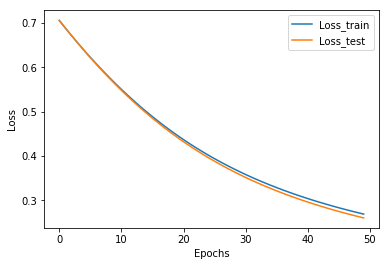

In [23]:
# Отрисуйте графики функиции потерь на тестовом наборе и на тренировочном

plt.plot(loss_train, label = "Loss_train")
plt.plot(loss_test, label = "Loss_test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

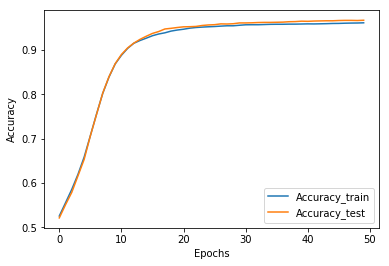

In [24]:
# Отрисуйте графики точности на тестовом наборе и на тренировочном

plt.plot(accuracy_train, label = "Accuracy_train")
plt.plot(accuracy_test, label = "Accuracy_test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Готовые ноутбуки сохраняйте строго в формате .ipynb, 
**название файла должно иметь вид: Surname_Name_HWnumber.ipynb . Например: Dochkina_Victoria_02.ipynb

## Отправляйте ваши ноутбуки в гугл форму: 
https://drive.google.com/open?id=1X78ZgpJNCW9ht2WBVYzvqwnVEEf1y9WLH1ETPaBnsWg


# Спасибо за терпение и выполнение заданий!

Здесь вы можете поделиться мыслями об этом задании:

In [1]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

А здесь посоветовать преподавателям годный фильм или сериал:

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ